# **Lineal Regression**

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


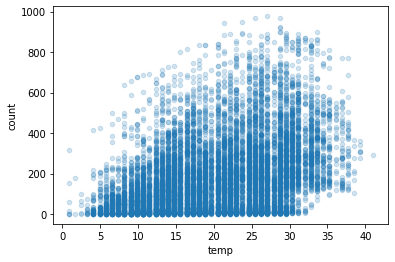

In [196]:
from importlib import resources
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

bikes = pd.read_csv('resources/bikeshare.csv')

# grafico de disperson entre temperatura y cantidad e bici alquiladas
bikes.plot(kind='scatter', x= 'temp', y= 'count', alpha= 0.2) # alpha es el tamaño de punto 
bikes.head()

SIgnificado de cada columna
* **season** 1= primavera 2= verano 3= otoño 4= invierno
* **holiday** si el dia se considera festivo 
* **workingday** si el dia es fin de semana o festivo
* **weather**   1.  Clear, Few clouds, Partly cloudy
                2.  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                3.  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                4.  Heavy Rain+ Ice Pallets+ Thunderstorm+ Mist, Snow + Fog
* **temp**: Temperature in Celsius
* **atemp**: Feels like temperature in Celsius
* **humidity**: Relative humidity
* **windspeed**: Wind speed
* **casual**: Number ofnon-registered user rentals initiated
* **registered**: Number of registered user rentals initiated
* **count**: Number of total rentals

Es decir que cada fila representa una observacion sobre la gestion  de alquileres de bicicleta a una dterminada hora

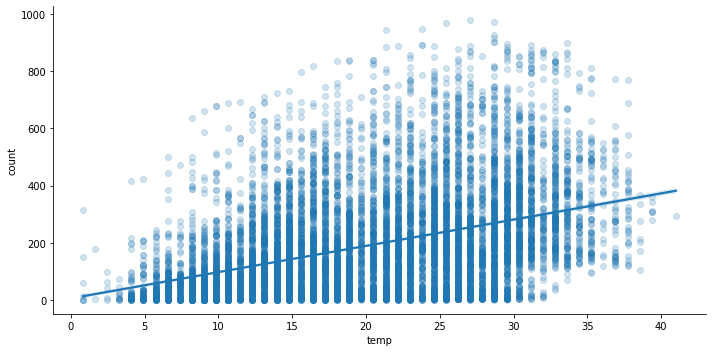

In [54]:
import seaborn as sns 
# obtener una línea de mejor ajuste
sns.lmplot(x='temp', y='count', data=bikes, aspect=2, scatter_kws={'alpha':0.2})

Parece q a medida de que la temperatura aumenta tambien aumenta la var count. veamos cual es su correlacion.

In [55]:
bikes[['temp','count']].corr()

,temp,count
temp,1.000000,0.394454
count,0.394454,1.000000


0.39 nos dice que existe una correlacion debil entre estas variables

In [56]:
from sklearn.linear_model import LinearRegression
import numpy as np
# crear los predictores y la var de respuesta
feature_list = ['temp']  # lista de predictores o caracteristicas
pred = bikes[feature_list]
resp = bikes['count']

linreg = LinearRegression()  # instantiate a new model
linreg.fit(pred, resp)       # fit the model to our data

print('Beta_0 : ', linreg.intercept_)
print('beta_i', linreg.coef_)

# hacer una prediccion

pf = pd.DataFrame({'temp': [20]})
# array = np.array([20])
# linreg.predict(array.reshape(1,-1)) # equivalnete a [[20]]
linreg.predict(pf)


Beta_0 :  6.046212959616469
beta_i [9.17054048]


array([189.45702259])

Lo que signifuca q un cambio en un grado de temperatura se asocia con 9.17 bicicletas mas alquiladas
**Aunque no tenemos medios para afirmar que el aumento de los alquileres esta causado por el cambio de temperatura; solo que parece haber un moviemto conjunto**

Vamos a añadir mas variables a nuestro analisis

In [57]:
# create a list of features
feature_list = ['temp', 'season', 'weather', 'humidity']

pred = bikes[feature_list]

# instantiate and fit
linreg = LinearRegression()
linreg.fit(pred,resp)

# pair the feature names with the coefficients
list(zip(feature_list, linreg.coef_))

[('temp', 7.864824992477452),
 ('season', 22.538757532466853),
 ('weather', 6.670302035923754),
 ('humidity', -3.1188733823964867)]

Observemosmque a medida que aumenta el **weather** los que significa que el tiempo se acerca a nublados y mal tiempo y tambien a medida que aumenta **season** es decir nos acercamos al invierno la demanda de bicivletas aumenta. y esto paree un poco contradictorio. veamos los **graficos de dispersion individuales** 

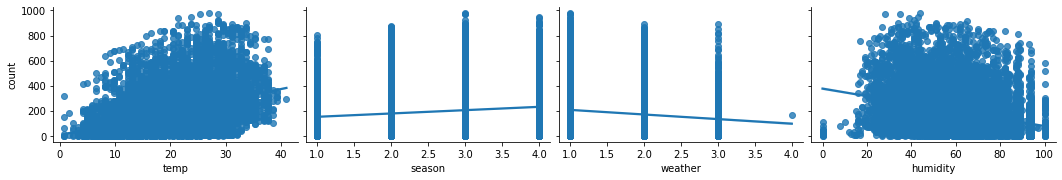

In [58]:
# multiple scatter plots
sns.pairplot(x_vars=feature_list, y_vars='count', data=bikes , kind= 'reg', aspect=1.5)


T como observams la linea de ajuste del **weather** tiende a bajar lo cual es contradictorio a lo  que teniamos en la regresion lineal. Ahora tenemos de preocuparnos cual de estos predictores estan ayudando a hacer la prediccion y cuales son solo ruido. mediante:

# **Regrssion Metrics**

In [161]:
from turtle import shape
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

feature_list = ['temp']
x = bikes[feature_list]
y = bikes['count']

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)

linreg = LinearRegression()
linreg.fit(x_train, y_train)

y_predictions = linreg.predict(x_test)

# calcular el RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_predictions))


166.1759559079105

Añadamos orro predictor al modelos a ver que ontenemos 

In [199]:
feature_list = ['temp','workingday']
x = bikes[feature_list]
y = bikes['count']

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)

linreg = LinearRegression()
linreg.fit(x_train, y_train)

y_predictions = linreg.predict(x_test)

# calcular el RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_predictions))

166.17868091458357

Nuestro modelo ha empeorado con esta adiccion del predictor **workingday** en un margen muy pequeño. Para saber  como de bien esta nuestro modelo en la prediccion con un RMSE = 167 aproximadamente. y para descubrirlo evaluamos **el modelo nulo**, es decir saber cuanto es el valor de la metrica si nuestro modelos solo predijera el valor medio de alquileres 

In [61]:

null_model_predictions = [y.mean()]*x.shape[0]
np.sqrt(metrics.mean_squared_error(y,null_model_predictions))

181.1361335742659

Solo predicinedo la media el RMSE es de 181 y podemos mejoralo incluso con una o dos caracteristicas

# **Logistic Regression**
Vamos a aplicar este modelo al ejemplo de las bicicletas y para ellos creamos una nueva columna binaria para saber si el nivel de alquiler de bicicletas es superior a la media o no 

In [62]:
# crear la variable de respuesta categorica
bikes['average_bike_count'] =bikes['count']>= bikes['count'].mean()
bikes[['count','average_bike_count']].head()


,count,average_bike_count
0,16,False
1,40,False
2,32,False
3,13,False
4,1,False


In [64]:
# saber las frecuencuas de cada valor para obtener el modelo nulo
bikes['average_bike_count'].value_counts(normalize=True)

False    0.599853
True     0.400147
Name: average_bike_count, dtype: float64

En **ML supervizados de categoria** nuestro **modelo nulo** siempre predice el modelo mas común, en este caso es que prediga False para todas las muestras y obteniendo un un porcentaje de prediciones correctas aproximadamente de 60%.

In [72]:
from sklearn.linear_model import LogisticRegression 

feature_list = ['temp']     # using only temperature

x = bikes[feature_list]
y = bikes['average_bike_count']     #variable de respuesta categorica(booleana)

x_train, x_test, y_train, y_test = train_test_split(x, y)

# make our train test split
logreg = LogisticRegression()   # instantate our model
logreg.fit(x_train, y_train)    # fit our model to our training set

logreg.score(x_test,y_test)     # punta sobre nuestra prueba para saber el % de predicciones correct


0.6546656869948567

Como podemos ver que solo utilizando la temperatura podemos superar el modelo nulo que es predecir falso todo el tiempo.

# **Dummy variables (variables ficticias)**

In [88]:
bikes['hour'] = bikes['datetime'].apply(lambda x:int(x[11]+x[12])) # obtener la hora de alquiler
# make a column that is just the hour of the day
bikes[['datetime','hour']].head()

,datetime,hour
0,2011-01-01 00:00:00,0
1,2011-01-01 01:00:00,1
2,2011-01-01 02:00:00,2
3,2011-01-01 03:00:00,3
4,2011-01-01 04:00:00,4


In [100]:
# this function takes in an integer hour
# and outputs one of our four options
def when_is_it(hour):

    if hour >= 5 and hour < 11:
        return "morning"
    elif hour >= 11 and hour < 16:
        return "afternoon"
    elif hour >= 16 and hour < 18:
        return "rush_hour"
    else:
        return "off_hours"


bikes['when_is_it'] = bikes['hour'].apply(when_is_it)
print(bikes['when_is_it'].unique())
bikes[['when_is_it', 'hour', 'average_bike_count']].head()


['off_hours' 'morning' 'afternoon' 'rush_hour']


,when_is_it,hour,average_bike_count
0,off_hours,0,False
1,off_hours,1,False
2,off_hours,2,False
3,off_hours,3,False
4,off_hours,4,False


Hagamos un analisis exploratorio de manera rapida con esta columna **when_it_is** para ver si influye en la columna **average_bike_count**. Para eso hagamos un grafico de barra para ver si se vizualiza alguna diferencia entre los 4 horarios del dia, cada barra representara el porcentaje de veces que ese horario tuvo alquiler de bicicletas

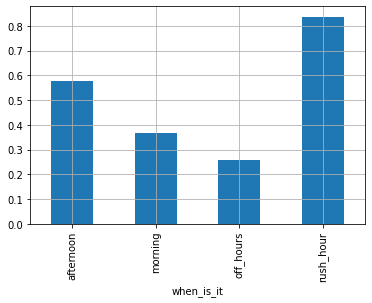

In [111]:
bikes.groupby('when_is_it')['average_bike_count'].mean().plot(kind='bar')
plt.grid()

Ahora para cada uno de los 4 valores nominales q tiene la columna **when_is_it** tendremos que crear una nueva columna booleana y utilizaremos **pandas** para extraer columnas ficticias

In [116]:
when_dummies = pd.get_dummies(bikes['when_is_it'], prefix='when')
when_dummies.head()


,when_afternoon,when_morning,when_off_hours,when_rush_hour
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [117]:
when_dummies = when_dummies.iloc[:, 1:] # remove the first column how an example
when_dummies.head()

,when_morning,when_off_hours,when_rush_hour
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [164]:
#ahora estamos listos para realizar la la regresion logistica

x = when_dummies
y = bikes['average_bike_count']        # variable de respuesta categorica

x_train, x_test, y_train, y_test = train_test_split(x, y)

logreg = LogisticRegression()
logreg.fit(x_train,y_train)

logreg.score(x_test,y_test)


0.7042615723732549

Usando solo las variables ficticias obtenemos un modelo mejor que con solo la temperatura. Provemos usar ademas la **humidity y la temp** para predecir si tendremos un alquiler de bicicletas superios  ala media o no(****average_bike_count)

In [191]:
# unir las las columnas d elos predictores
x = pd.concat([when_dummies,bikes[['temp','humidity']]],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y)

logreg = LogisticRegression()
logreg.fit(x_train,y_train)

logreg.score(x_test,y_test)


0.7446730345334313

Y obtenemos un nivel de aceptar en l prediccion de un 75%, que es el mejor que hemos obtenido hasta ahora